In [129]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
import os.path
%matplotlib inline

# import the SQUID data
filepath = 'C:\\Users\\F25_1.307_b\\Nextcloud\\Klingeler_Masterarbeit\\howardevansite\\NaCuFe2(VO4)3 powder\\data fixed powder\\4K\\'
filename = 'F051p0T04K-u'
text = '4.00K 51.0GHz'


# field in T
field = []
# amplitude in db
amp=[]
# phase in °
phase = []
# temperature in K
temp=[]
# real part
real=[]
# imaginary part
imaginary=[]

f = open(filepath+filename, 'r')
f.readline()
f.readline()
for line in f:
    line=line.strip()
    line=line.split()
    temp.append(float(line[0]))
    field.append(float(line[1]))
    amp.append(float(line[2]))
    phase.append(float(line[3]))
    real.append(float(line[4]))
    imaginary.append(float(line[5]))

field = np.array(field)
amp = np.array(amp)
phase = np.array(phase)
temp = np.array(temp)
real = np.array(real)
imaginary = np.array(imaginary)


def polynomial(x, a, b, c, d, e, f, g, h, i, j):
    return (a*x**9 + b*x**8 + c*x**7 + d*x**6 + e*x**5 + f*x**4 + g*x**3 + h*x**2 + i*x + j)

def fitpolynomial(n, xmin, xmax, amp, field):
    mask = np.array([[any([(field<xmin[j])[i],(field>xmax[j])[i]]) for i in np.arange(len(field))] for j in np.arange(len(xmax))])
    mask = [all([mask[j,i] for j in np.arange(len(xmax))]) for i in np.arange(len(field))]
    fieldcut = field[mask]
    ampcut = amp[mask]

    if n == 9:
        def fct(x, a, b, c, d, e, f, g, h, i, j):
            return polynomial(x, a, b, c, d, e, f, g, h, i, j)
        parameters, pcov = curve_fit(fct, fieldcut, ampcut)
        fit = fct(field, parameters[0], parameters[1], parameters[2], parameters[3], parameters[4], parameters[5], parameters[6], parameters[7], parameters[8], parameters[9])
           
    elif n==8:
        def fct(x, b, c, d, e, f, g, h, i, j):
            return polynomial(x, 0, b, c, d, e, f, g, h, i, j)
        parameters, pcov = curve_fit(fct, fieldcut, ampcut)
        fit = fct(field, parameters[0], parameters[1], parameters[2], parameters[3], parameters[4], parameters[5], parameters[6], parameters[7], parameters[8])
           
    elif n==7:
        def fct(x, c, d, e, f, g, h, i, j):
            return polynomial(x, 0, 0, c, d, e, f, g, h, i, j)
        parameters, pcov = curve_fit(fct, fieldcut, ampcut)
        fit = fct(field, parameters[0], parameters[1], parameters[2], parameters[3], parameters[4], parameters[5], parameters[6], parameters[7])
         
    elif n==6:
        def fct(x, d, e, f, g, h, i, j):
            return polynomial(x, 0, 0, 0, d, e, f, g, h, i, j)
        parameters, pcov = curve_fit(fct, fieldcut, ampcut)
        fit = fct(field, parameters[0], parameters[1], parameters[2], parameters[3], parameters[4], parameters[5], parameters[6])
               
    elif n==5:
        def fct(x, e, f, g, h, i, j):
            return polynomial(x, 0, 0, 0, 0, e, f, g, h, i, j)
        parameters, pcov = curve_fit(fct, fieldcut, ampcut)
        fit = fct(field, parameters[0], parameters[1], parameters[2], parameters[3], parameters[4], parameters[5])
               
    elif n==4:
        def fct(x, f, g, h, i, j):
            return polynomial(x, 0, 0, 0, 0, 0, f, g, h, i, j)
        parameters, pcov = curve_fit(fct, fieldcut, ampcut)
              
    elif n==3:
        def fct(x, g, h, i, j):
            return polynomial(x, 0, 0, 0, 0, 0, 0, g, h, i, j)
        parameters, pcov = curve_fit(fct, fieldcut, ampcut)
        fit = fct(field, parameters[0], parameters[1], parameters[2], parameters[3])
        
    elif n==2:
        def fct(x, h, i, j):
            return polynomial(x, 0, 0, 0, 0, 0, 0, 0, h, i, j)
        parameters, pcov = curve_fit(fct, fieldcut, ampcut)
        fit = fct(field, parameters[0], parameters[1], parameters[2])
                        
    elif n==1:
        def fct(x, i, j):
            return polynomial(x, 0, 0, 0, 0, 0, 0, 0, 0, i, j)
        parameters, pcov = curve_fit(fct, fieldcut, ampcut)
        fit = fct(field, parameters[0], parameters[1])
            
    ampsubtract = amp - fit
    return (ampsubtract, fit)

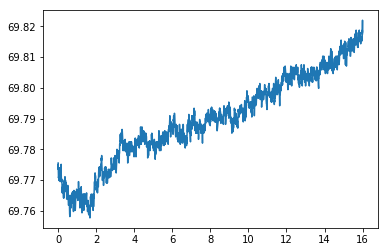

In [124]:
plt.plot(field, amp)

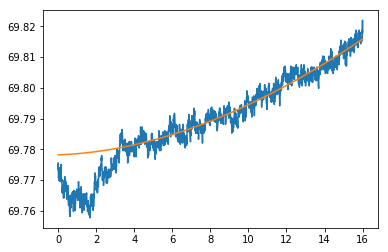

In [130]:
xmin = [-1]
xmax = [4]
n = 3

ampsubtract = fitpolynomial(n, xmin, xmax, amp, field)[0]
fit = fitpolynomial(n, xmin, xmax, amp, field)[1]

plt.plot(field, amp)
plt.plot(field, fit)

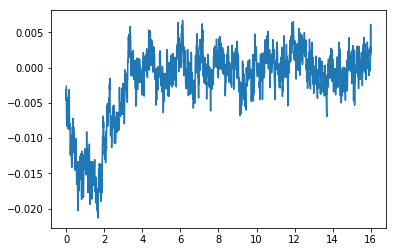

In [131]:
plt.plot(field, ampsubtract)

In [138]:
with open(filepath+filename+'new', 'w') as g:
    g.write('Field (T)'+'\t'+'Amp (dB)'+'\t'+'Phase(°)'+'\t'+'Temperature'+'\t'+'AmpOld (dB)'+'\t'+'RealPart'+'\t'+'ImaginaryPart'+'\n')
    g.write(''+'\t'+text+'\t'+''+'\t'+''+'\t'+''+'\t'+''+'\t'+''+'\n')
    for i in np.arange(len(field)):
        g.write(str(field[i])+'\t'+str(ampsubtract[i])+'\t'+str(phase[i])+'\t'+str(temp[i])+'\t'+str(amp[i])+'\t'+str(real[i])+'\t'+str(imaginary[i])+'\n')

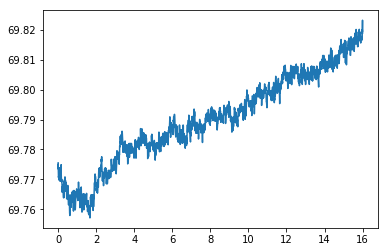

In [143]:
epsilon=0.001
plt.plot(field, amp+epsilon*phase)